# 1. transfer learning

In [1]:
import pandas as pd
import numpy as np

file='../raw_data/1.0.3/training_data.csv'
df=pd.read_csv(file)
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [2]:
import wfdb

head_1=wfdb.rdsamp('../raw_data/1.0.3/training_data/2530_AV')
head_1

(array([[-425.],
        [1045.],
        [ 518.],
        ...,
        [ 509.],
        [ 443.],
        [ 122.]]),
 {'fs': 4000,
  'sig_len': 94400,
  'n_sig': 1,
  'base_date': None,
  'base_time': None,
  'units': ['mV'],
  'sig_name': ['AV'],
  'comments': []})

In [3]:
from scipy.signal import butter, lfilter

fs = 4000.0
lowcut = 15.0
highcut = 150.0

def butter_bandpass(lowcut, highcut, fs, order=3):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

x = head_1[0].flatten()
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)

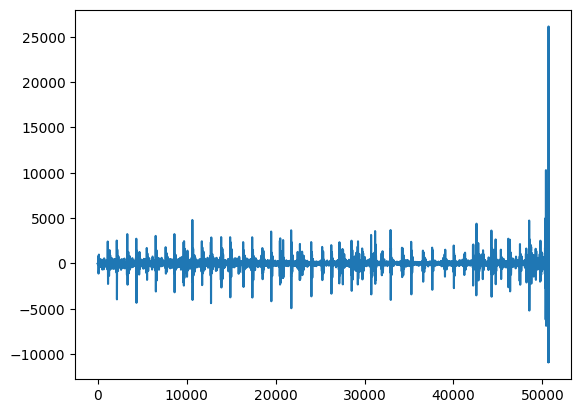

In [4]:
import matplotlib.pyplot as plt

plt.plot(y);

In [5]:
y_1=y[~np.isnan(y)]

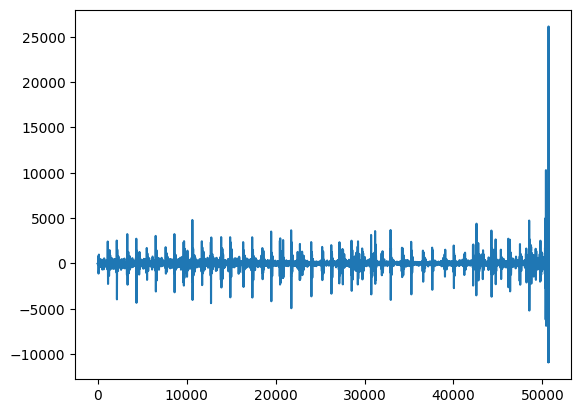

In [6]:
plt.plot(y_1);

In [7]:
np.amax(y_1)

26150.75571580454

In [8]:
y_2=(y_1/np.abs(np.amax(y_1)))[0:6000]

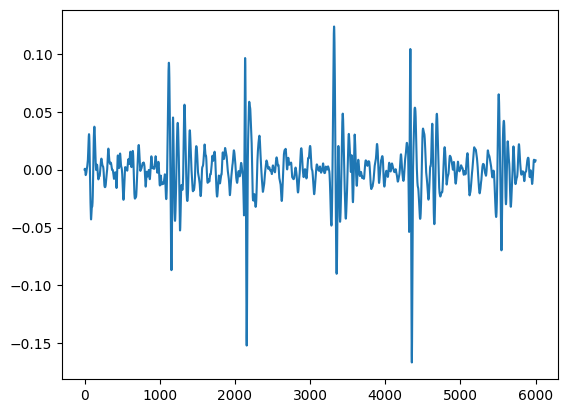

In [9]:
plt.plot(y_2);

In [10]:
y_2

array([-1.58416796e-05, -4.91456195e-05, -1.94860312e-06, ...,
        7.55478835e-03,  7.76267063e-03,  7.95834162e-03])

TypeError: alpha must be numeric or None, not a string

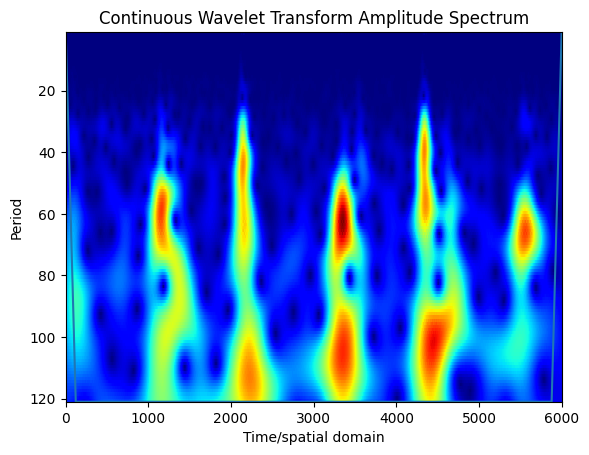

In [16]:
import pywt
import scaleogram as scg

time=np.arange(6000)
scales=np.arange(1,121)
wavelet='cmorl.5-1.0'
cmap='jet'

scg.cws(time=time, signal=y_2, scales=scales, wavelet=wavelet, cmap=cmap)


In [17]:
coef, fr=pywt.cwt(data=y_2, scales=scales, wavelet=wavelet)

In [18]:
coef.shape

(120, 6000)

In [19]:
fr

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
       0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
       0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
       0.01408451, 0.01388889, 0.01369863, 0.01351351, 0.01333

In [20]:
len(fr)

120